<a href="https://colab.research.google.com/github/takaito1/EAS4821_S2024/blob/main/scripts/intro_xarray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to xarray
- Data example:  NCEP reanalysis surface data
- [https://psl.noaa.gov/data/gridded/data.ncep.reanalysis.derived.surface.html](https://psl.noaa.gov/data/gridded/data.ncep.reanalysis.derived.surface.html)
## DataArray
- The DataArray class is the basic unit in xarray. DataArray is used to attach a name, dimension names, labels, and attributes to an array.
## Dataset
- Dataset can contain a DataArray or multiple DataArrays
- Dataset can be saved as a netCDF file


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## read in data
- monthlt air temperature (air.mon.mean.nc)

In [5]:
# opening netCDF file --> dataset object 'ds'
ds=xr.open_dataset('/content/drive/MyDrive/EAS2655_4821/air.2m.mon.mean.nc')

In [6]:
# display the contents of netCDF file
ds

<xarray.Dataset>
Dimensions:  (lat: 94, lon: 192, time: 913)
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2024-01-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    NCO:            20121012
    history:        created 97/10/04 by Hoop (netCDF2.3)\nConverted to chunke...
    title:          monthly mean air.2m from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

### We can access “layers” of the Dataset (individual DataArrays) with dictionary syntax

In [7]:
ds['air']

<xarray.DataArray 'air' (time: 913, lat: 94, lon: 192)>
[16477824 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2024-01-01
Attributes: (12/13)
    long_name:                Monthly Mean of Air Temperature
    valid_range:              [150. 400.]
    units:                    degK
    precision:                2
    least_significant_digit:  1
    GRIB_id:                  11
    ...                       ...
    var_desc:                 Air temperature
    level_desc:               2 m
    statistic:                Mean
    parent_stat:              Individual Obs
    dataset:                  NCEP Reanalysis Derived Products
    actual_range:             [187.4545  314.80725]

In [9]:
# to display data
ds.air.data

array([[[234.9819 , 234.92842, 234.83902, ..., 235.29837, 235.19838,
         235.09033],
        [236.4642 , 236.53905, 236.59323, ..., 236.22937, 236.30875,
         236.38678],
        [238.27647, 238.55681, 238.81873, ..., 237.30289, 237.64   ,
         237.96582],
        ...,
        [256.20163, 256.4358 , 256.67517, ..., 255.58   , 255.7639 ,
         255.98228],
        [256.7768 , 256.84772, 256.92035, ..., 256.6126 , 256.6629 ,
         256.71967],
        [256.88358, 256.86517, 256.84003, ..., 256.92194, 256.91614,
         256.90134]],

       [[237.22414, 237.29341, 237.33624, ..., 237.09726, 237.14105,
         237.18138],
        [236.86035, 237.0452 , 237.2293 , ..., 236.32518, 236.50345,
         236.68175],
        [238.43451, 238.8    , 239.1414 , ..., 237.2655 , 237.66347,
         238.05687],
        ...,
        [236.4238 , 236.71274, 237.0707 , ..., 236.19109, 236.22896,
         236.30139],
        [237.08449, 237.08897, 237.13345, ..., 237.35277, 237.24312,
   

In [10]:
# to display coordinates
ds.air.coords

Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2024-01-01

In [11]:
# to display specific coordinates
ds.air.lat

<xarray.DataArray 'lat' (lat: 94)>
array([ 88.542   ,  86.6531  ,  84.7532  ,  82.8508  ,  80.9473  ,  79.0435  ,
        77.1394  ,  75.2351  ,  73.3307  ,  71.4262  ,  69.5217  ,  67.6171  ,
        65.7125  ,  63.8079  ,  61.9033  ,  59.9986  ,  58.0939  ,  56.1893  ,
        54.2846  ,  52.3799  ,  50.4752  ,  48.5705  ,  46.6658  ,  44.7611  ,
        42.8564  ,  40.9517  ,  39.047   ,  37.1422  ,  35.2375  ,  33.3328  ,
        31.4281  ,  29.5234  ,  27.6186  ,  25.7139  ,  23.8092  ,  21.9044  ,
        19.9997  ,  18.095   ,  16.1902  ,  14.2855  ,  12.3808  ,  10.47604 ,
         8.57131 ,   6.66657 ,   4.76184 ,   2.8571  ,   0.952368,  -0.952368,
        -2.8571  ,  -4.76184 ,  -6.66657 ,  -8.57131 , -10.47604 , -12.3808  ,
       -14.2855  , -16.1902  , -18.095   , -19.9997  , -21.9044  , -23.8092  ,
       -25.7139  , -27.6186  , -29.5234  , -31.4281  , -33.3328  , -35.2375  ,
       -37.1422  , -39.047   , -40.9517  , -42.8564  , -44.7611  , -46.6658  ,
       -48.5705  , -50.4752  , -52.3799  , -54.2846  , -56.1893  , -58.0939  ,
       -59.9986  , -61.9033  , -63.8079  , -65.7125  , -67.6171  , -69.5217  ,
       -71.4262  , -73.3307  , -75.2351  , -77.1394  , -79.0435  , -80.9473  ,
       -82.8508  , -84.7532  , -86.6531  , -88.542   ], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
Attributes:
    units:          degrees_north
    actual_range:   [ 88.542 -88.542]
    long_name:      Latitude
    standard_name:  latitude
    axis:           Y

In [12]:
# to display attributes
ds.air.attrs

{'long_name': 'Monthly Mean of Air Temperature',
 'valid_range': array([150., 400.], dtype=float32),
 'units': 'degK',
 'precision': 2,
 'least_significant_digit': 1,
 'GRIB_id': 11,
 'GRIB_name': 'TMP',
 'var_desc': 'Air temperature',
 'level_desc': '2 m',
 'statistic': 'Mean',
 'parent_stat': 'Individual Obs',
 'dataset': 'NCEP Reanalysis Derived Products',
 'actual_range': array([187.4545 , 314.80725], dtype=float32)}

## Displaying data in DataArray
- We can extract a portion of data from DataArray and display it

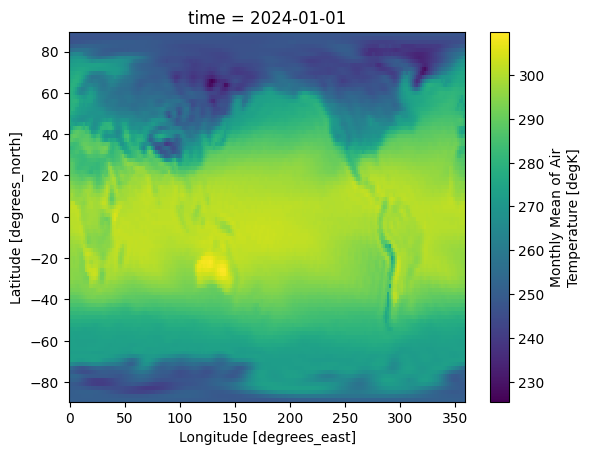

In [13]:
# display the air temperature from January 2024
ds.air.sel(time='2024-01').plot()

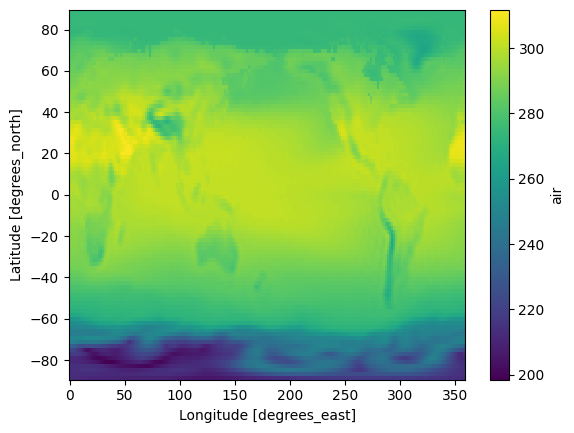

In [14]:
# extract all July temperature and averge them, then plot it
ds.air[6::12,:,:].mean('time').plot()

In [24]:
# you can check the time indexing
ds.time[6::12]

<xarray.DataArray 'time' (time: 76)>
array(['1948-07-01T00:00:00.000000000', '1949-07-01T00:00:00.000000000',
       '1950-07-01T00:00:00.000000000', '1951-07-01T00:00:00.000000000',
       '1952-07-01T00:00:00.000000000', '1953-07-01T00:00:00.000000000',
       '1954-07-01T00:00:00.000000000', '1955-07-01T00:00:00.000000000',
       '1956-07-01T00:00:00.000000000', '1957-07-01T00:00:00.000000000',
       '1958-07-01T00:00:00.000000000', '1959-07-01T00:00:00.000000000',
       '1960-07-01T00:00:00.000000000', '1961-07-01T00:00:00.000000000',
       '1962-07-01T00:00:00.000000000', '1963-07-01T00:00:00.000000000',
       '1964-07-01T00:00:00.000000000', '1965-07-01T00:00:00.000000000',
       '1966-07-01T00:00:00.000000000', '1967-07-01T00:00:00.000000000',
       '1968-07-01T00:00:00.000000000', '1969-07-01T00:00:00.000000000',
       '1970-07-01T00:00:00.000000000', '1971-07-01T00:00:00.000000000',
       '1972-07-01T00:00:00.000000000', '1973-07-01T00:00:00.000000000',
       '1974-07-01T00:00:00.000000000', '1975-07-01T00:00:00.000000000',
       '1976-07-01T00:00:00.000000000', '1977-07-01T00:00:00.000000000',
       '1978-07-01T00:00:00.000000000', '1979-07-01T00:00:00.000000000',
       '1980-07-01T00:00:00.000000000', '1981-07-01T00:00:00.000000000',
       '1982-07-01T00:00:00.000000000', '1983-07-01T00:00:00.000000000',
       '1984-07-01T00:00:00.000000000', '1985-07-01T00:00:00.000000000',
       '1986-07-01T00:00:00.000000000', '1987-07-01T00:00:00.000000000',
       '1988-07-01T00:00:00.000000000', '1989-07-01T00:00:00.000000000',
       '1990-07-01T00:00:00.000000000', '1991-07-01T00:00:00.000000000',
       '1992-07-01T00:00:00.000000000', '1993-07-01T00:00:00.000000000',
       '1994-07-01T00:00:00.000000000', '1995-07-01T00:00:00.000000000',
       '1996-07-01T00:00:00.000000000', '1997-07-01T00:00:00.000000000',
       '1998-07-01T00:00:00.000000000', '1999-07-01T00:00:00.000000000',
       '2000-07-01T00:00:00.000000000', '2001-07-01T00:00:00.000000000',
       '2002-07-01T00:00:00.000000000', '2003-07-01T00:00:00.000000000',
       '2004-07-01T00:00:00.000000000', '2005-07-01T00:00:00.000000000',
       '2006-07-01T00:00:00.000000000', '2007-07-01T00:00:00.000000000',
       '2008-07-01T00:00:00.000000000', '2009-07-01T00:00:00.000000000',
       '2010-07-01T00:00:00.000000000', '2011-07-01T00:00:00.000000000',
       '2012-07-01T00:00:00.000000000', '2013-07-01T00:00:00.000000000',
       '2014-07-01T00:00:00.000000000', '2015-07-01T00:00:00.000000000',
       '2016-07-01T00:00:00.000000000', '2017-07-01T00:00:00.000000000',
       '2018-07-01T00:00:00.000000000', '2019-07-01T00:00:00.000000000',
       '2020-07-01T00:00:00.000000000', '2021-07-01T00:00:00.000000000',
       '2022-07-01T00:00:00.000000000', '2023-07-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1948-07-01 1949-07-01 ... 2023-07-01
Attributes:
    long_name:        Time
    delta_t:          0000-01-00 00:00:00
    avg_period:       0017-00-00 00:00:00
    prev_avg_period:  0000-00-01 00:00:00
    standard_name:    time
    axis:             T
    actual_range:     [1297320. 1963536.]

In [25]:
# you can select a certain time period using slice()
ds.time[6::12].sel(time=slice('1950-01','1960-01'))

<xarray.DataArray 'time' (time: 10)>
array(['1950-07-01T00:00:00.000000000', '1951-07-01T00:00:00.000000000',
       '1952-07-01T00:00:00.000000000', '1953-07-01T00:00:00.000000000',
       '1954-07-01T00:00:00.000000000', '1955-07-01T00:00:00.000000000',
       '1956-07-01T00:00:00.000000000', '1957-07-01T00:00:00.000000000',
       '1958-07-01T00:00:00.000000000', '1959-07-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1950-07-01 1951-07-01 ... 1959-07-01
Attributes:
    long_name:        Time
    delta_t:          0000-01-00 00:00:00
    avg_period:       0017-00-00 00:00:00
    prev_avg_period:  0000-00-01 00:00:00
    standard_name:    time
    axis:             T
    actual_range:     [1297320. 1963536.]

/usr/local/lib/python3.10/dist-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


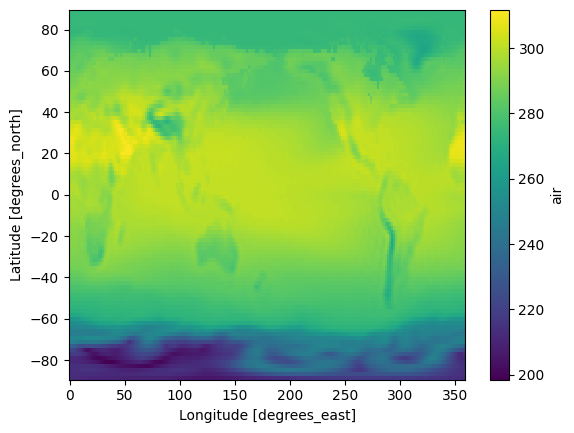

In [15]:
# Doing the same thing as above, but using a different way of extracting July temperature
ds.air.sel(time=(ds.time.dt.month==7)).mean('time').plot()

/usr/local/lib/python3.10/dist-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


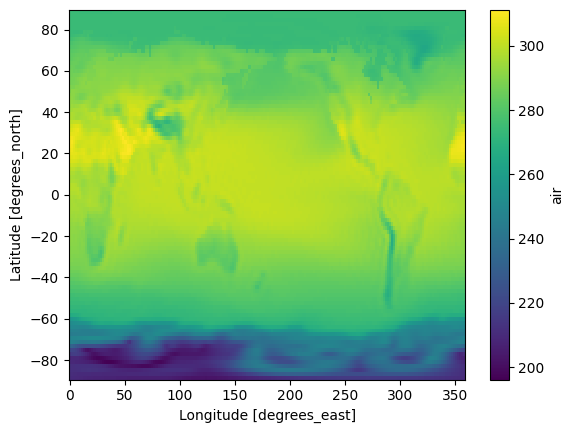

In [23]:
# you can further select a certain time period
ds.air.sel(time=(ds.time.dt.month==7)).sel(time=slice('1950-01','1980-01')).mean('time').plot()

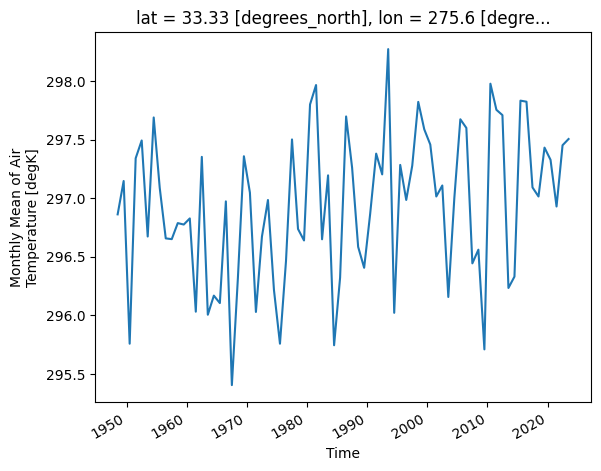

In [22]:
# extract the July temperature of grid cell for Atlanta and display a time series plot
# Atlanta is 33 degree N, 84 degree W
ds.air[6::12,:,:].sel(lat=33,method='nearest').sel(lon=360-84,method='nearest').plot()

### From DataArray to numpy array, you can use .to_numpy() method
- sometimes, we want to perform calculations using numpy
- we can transform the data into numpy array and then calculate/plot, which may provide more flexibility

In [ ]:
# compare the weather station data and regional data (NCEP)
#
# Extracting temperature data from a dataset for a specific location (Atlanta), converting from Kelvin to Celsius
Tncep = ds.air[1::12, :, :].sel(lat=33, method='nearest').sel(lon=360 - 84, method='nearest').to_numpy() - 273.15

# Reading temperature data from a CSV file ('Atlanta.csv') for the month of February, converting from Fahrenheit to Celsius, and filtering for years 1948 to 2025
df = pd.read_csv('Atlanta.csv', skiprows=1, index_col=0)
#
Tstn = (df['February'].loc[1948:2025].to_numpy() - 32) * 5 / 9

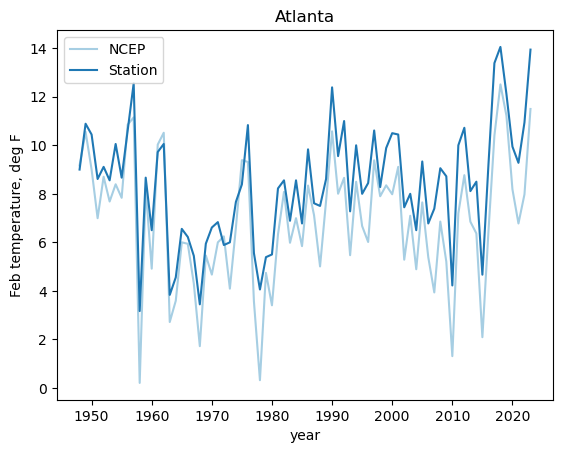

In [ ]:
year = np.arange(1948,2024,1)
cm = plt.get_cmap('Paired')
plt.plot(year,Tncep,label='NCEP',color=cm(0))
plt.plot(year,Tstn,label='Station',color=cm(1))
plt.xlabel('year')
plt.ylabel('Feb temperature, deg F')
plt.title('Atlanta')
plt.legend()

## Perform some calculations before plotting

In [ ]:
# split data into months and take averages
Tclim = ds.air.groupby('time.month').mean('time')

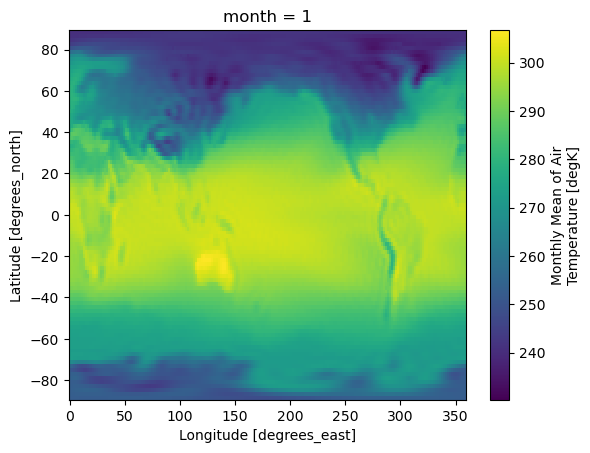

In [ ]:
Tclim.sel(month=1).plot()

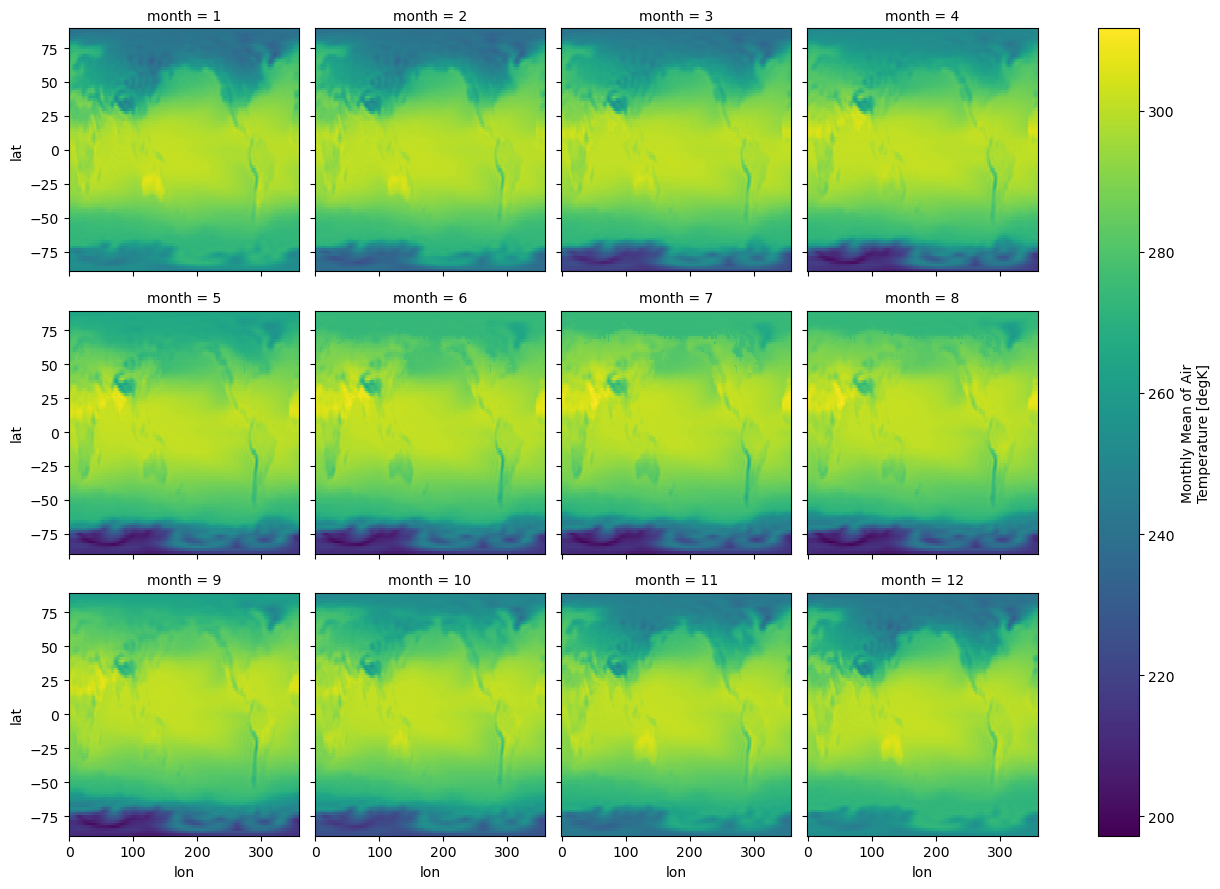

In [ ]:
# generate monthly mean temperature plot for all months
Tclim.plot(col='month',col_wrap=4)

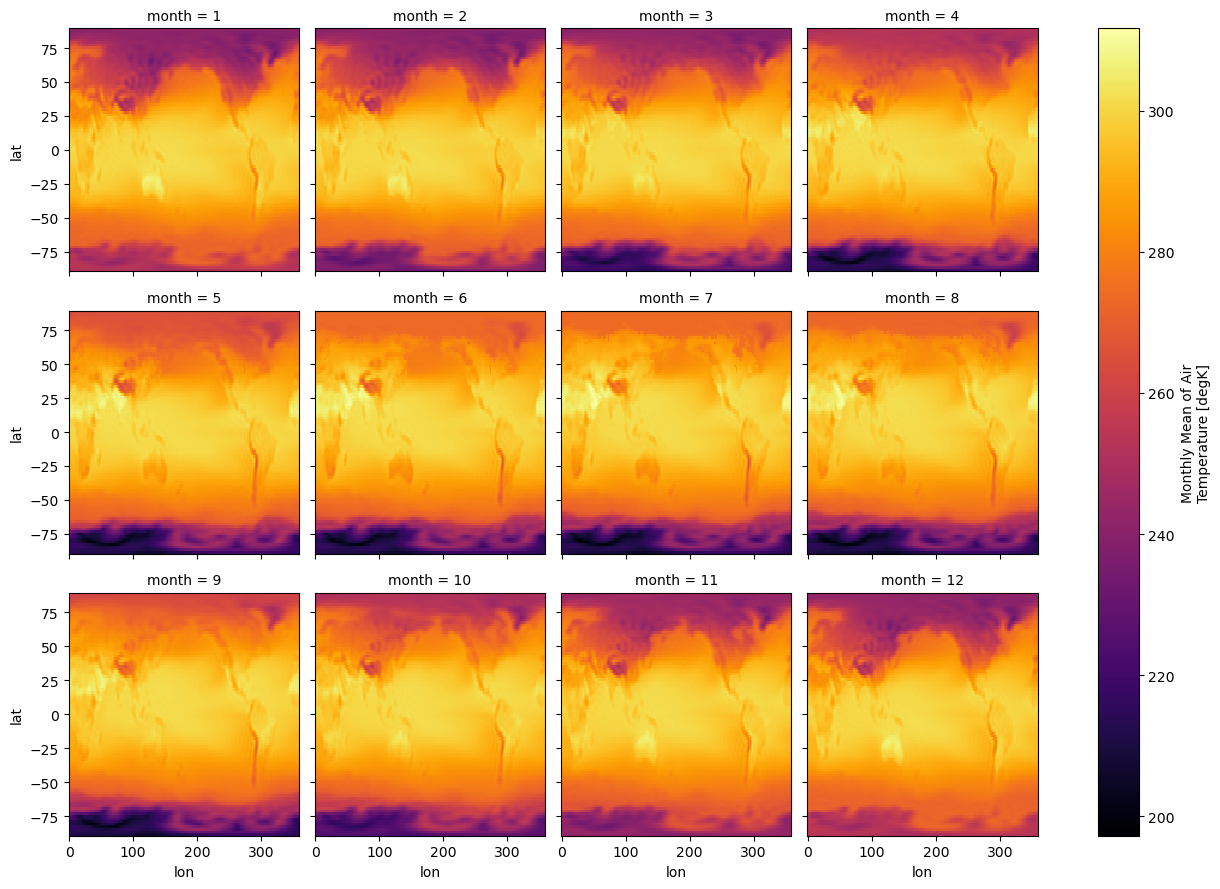

In [ ]:
# generate monthly mean temperature plot for all months
Tclim.plot(col='month',col_wrap=4,cmap='inferno')

In [ ]:
# define temperature anomaly by subtracting monthly mean climatology
Tanom = ds.air.groupby('time.month') - Tclim

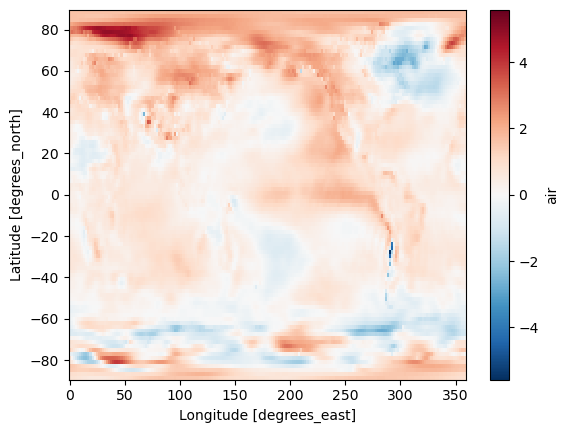

In [ ]:
# Plot the temperature anomaly for 2015
Tanom.sel(time=slice('2015-01','2015-12')).mean('time').plot()

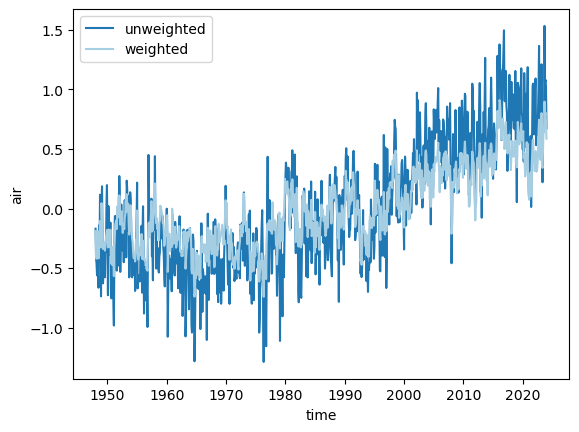

In [ ]:
# Plot global temperature anomaly
#
# first develop cos(lat) weighting factor
lat = ds.lat
coslat = np.cos(np.deg2rad(lat))
Tanom_weighted = Tanom.weighted(coslat)
#
Tanom.mean(('lon','lat')).plot(label='unweighted',color=cm(1))
Tanom_weighted.mean(('lon','lat')).plot(label='weighted',color=cm(0))
plt.legend()